# Graph-Accelerated Simulation of N-Body-Systems
-----

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.config import list_physical_devices
print("Num GPUs Available: ", len(list_physical_devices('GPU')))

from importlib import reload  
import n_body_system as nbs
nbs = reload(nbs)
NBodySystem = nbs.NBodySystem

Num GPUs Available:  1


In [19]:
## Settings
AU, ED = NBodySystem.astronomical_unit, NBodySystem.earth_day

## Random Stars Initializations

In [20]:
## For Planet-System scale:
mean  = 0
std_x = 10.
std_v = 0.05

## For Interstellar-System scale:
# mean = 0
# std_x = 1000.
# std_v = 1.

In [21]:
N_init = 1000
X0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_x)
V0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_v)
M0 = np.random.chisquare(df=1, size=N_init)

## Appending large gravitational center
# X0 = np.concatenate([X0, [3*[0.]]], axis=0)
# V0 = np.concatenate([V0, [3*[0.]]], axis=0)
# M0 = np.concatenate([M0, [1e9]], axis=0)

In [24]:
system = NBodySystem(X0, V0, M0, dt=1., smooth=1e-3)

In [25]:
system.simulation(500)

100%|██████████| 500/500 [00:02<00:00, 211.93it/s]


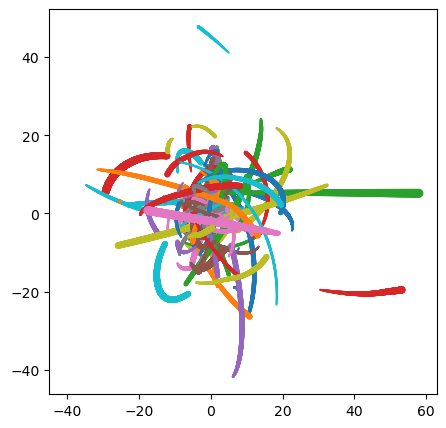

In [26]:
system.plot_history_2d(ZSIZE=True, n_sample=100)

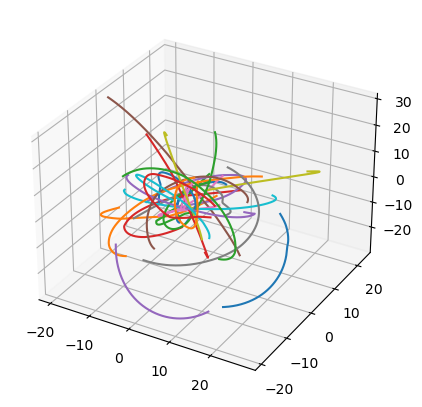

In [27]:
system.plot_history_3d()

## 2 Suns

In [15]:
X = np.array([
    [-1., 0., 0.], # Sun 
    [ 1., 0., 0.], # Sun 2
    [ 0., 0., 0.]  # Poor Planet
])

V = np.array([
    [0., -0.01, 0.], # Sun 
    [0.,  0.01, 0.], # Sun 2
    [ 0., 0.001, 0.001]   # Poor Planet
])

M = np.array([
    1.,  # Sun
    1.,  # Sun2
    1e-5 # Poor Planet
])

In [16]:
S2_system = NBodySystem(X, V, M, dt=1)

In [17]:
S2_system.step()

In [18]:
S2_system.simulation(3*365)

100%|██████████| 1095/1095 [00:01<00:00, 598.23it/s]


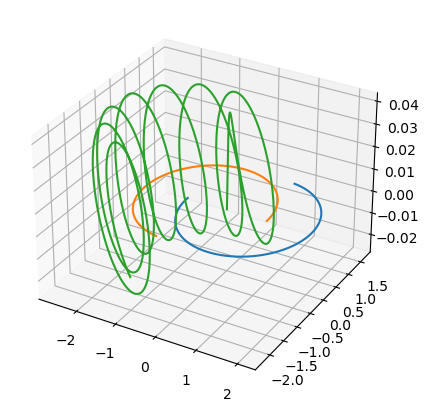

In [19]:
S2_system.plot_history_3d()

## Sun-Earth-Mars

In [20]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.]  # Mars
])

V = np.array([
    [0.,           0., 0.], # Sun 
    [0., 29290./AU*ED, 0.],  # Earth
    [27070./AU*ED, 0., 0.],  # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6  # Mars
])

In [21]:
SEM_system = NBodySystem(X, V, M)

In [22]:
SEM_system.simulation(3*365)

100%|██████████| 1095/1095 [00:01<00:00, 564.53it/s]


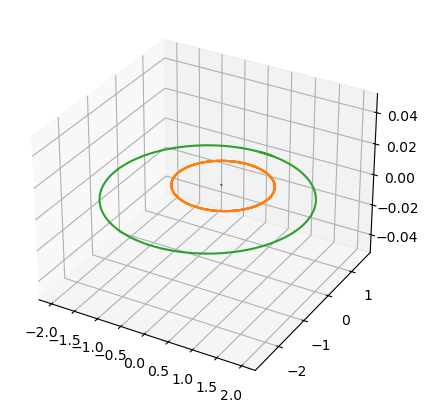

In [23]:
SEM_system.plot_history_3d()

## Earth Moon

In [24]:
X = np.array([
    [0., 0.,  0.], # Earth
    [383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0., 0.,          0.], # Earth
    [0., 1023./AU*ED, 0.]  # Moon
])

M = np.array([
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [25]:
EMo_system = NBodySystem(X, V, M, dt=1.)

In [26]:
EMo_system.simulation(300)

100%|██████████| 300/300 [00:00<00:00, 421.62it/s]


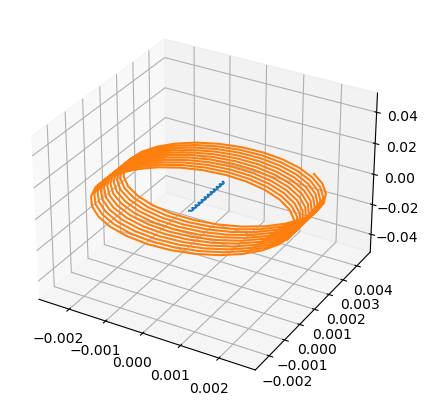

In [27]:
EMo_system.plot_history_3d()

In [28]:
x_earth = EMo_system._Q_hist[:, 0, :]
x_moon  = EMo_system._Q_hist[:, 1, :]
x_diff = x_moon - x_earth

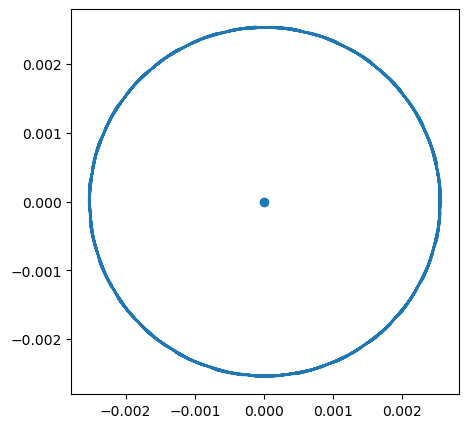

In [29]:
plt.figure(figsize=(5, 5))
plt.plot(x_diff[:, 0], x_diff[:, 1])
plt.scatter(0, 0)
plt.show()

## Sun Earth Moon

In [30]:
## Ecliptic tilt
sigma = 5. * np.pi / 180.

X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [1. + 383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0.,                     0., 0.], # Sun 
    [0.,           29290./AU*ED, 0.], # Earth
    [0., 29290./AU*ED + 1023.*np.cos(sigma)/AU*ED, 1023.*np.sin(sigma)/AU*ED]  # Moon  
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [31]:
SEMo_system = NBodySystem(X, V, M, dt=1., smooth=0.)

In [32]:
SEMo_system.simulation(2*365, algo="rk4")

100%|██████████| 730/730 [00:01<00:00, 516.64it/s]


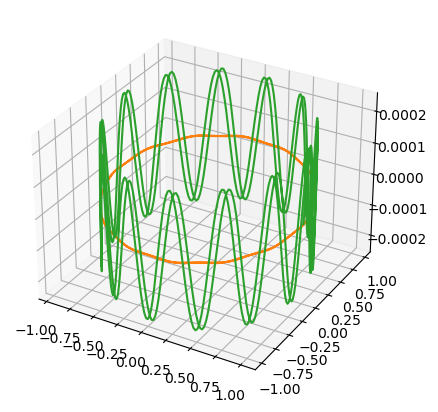

In [33]:
SEMo_system.plot_history_3d()

Relative coordinate Earth - Moon

In [34]:
x_earth = SEMo_system._Q_hist[:, 1, :]
x_moon  = SEMo_system._Q_hist[:, 2, :]
x_diff = x_moon - x_earth

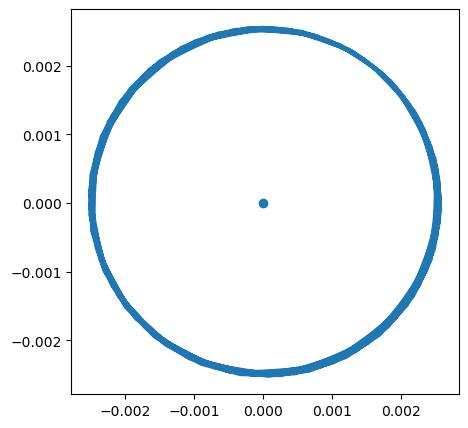

In [35]:
plt.figure(figsize=(5, 5))
plt.plot(x_diff[:, 0], x_diff[:, 1])
plt.scatter(0, 0)
plt.show()

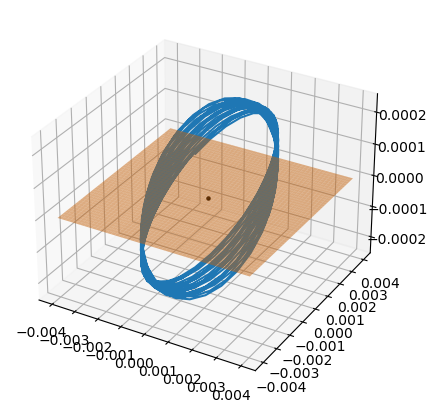

In [36]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(
    x_diff[:, 0], 
    x_diff[:, 1], 
    x_diff[:, 2]
)
## Ecliptic Plane
xx, yy = np.meshgrid(
    np.linspace(-0.004, 0.004), 
    np.linspace(-0.004, 0.004)
)
z = xx-xx

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)
ax.scatter(0, 0, 0, color="black", s=5)
plt.show()

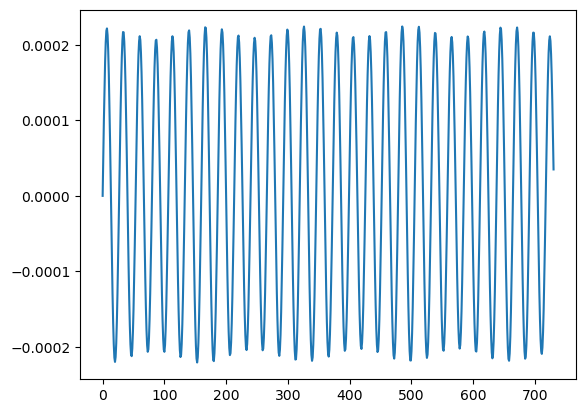

In [37]:
plt.plot(x_diff[:, 2])